In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
data = make_blobs(n_samples=2000, cluster_std=[1.5, 2.5, 1.5, 2.5, 0.5, 0.6, 1.1, 1.2, 2, 2 ], centers=10, random_state=101)

In [3]:
df = pd.DataFrame(data[0])
df['target'] = data[1]
df

,0,1,target
0,10.114356,-5.924125,7
1,0.251168,0.754660,0
2,-1.242197,3.352499,0
3,1.201378,6.050632,2
4,3.410509,6.591522,2
...,...,...,...
1995,4.236120,-1.650482,9
1996,9.021671,-5.714502,7
1997,-6.302885,10.076184,3
1998,5.182414,4.902051,2


# K-Means Cluster Creation

In [4]:
from sklearn.cluster import KMeans

In [5]:
names = ['K-Means with ' + str(idx) + ' clusters' for idx in range(2,11,2)]

kmean_clusters = [KMeans(n_clusters=2),
                  KMeans(n_clusters=4),
                  KMeans(n_clusters=6),
                  KMeans(n_clusters=8),
                  KMeans(n_clusters=10)]

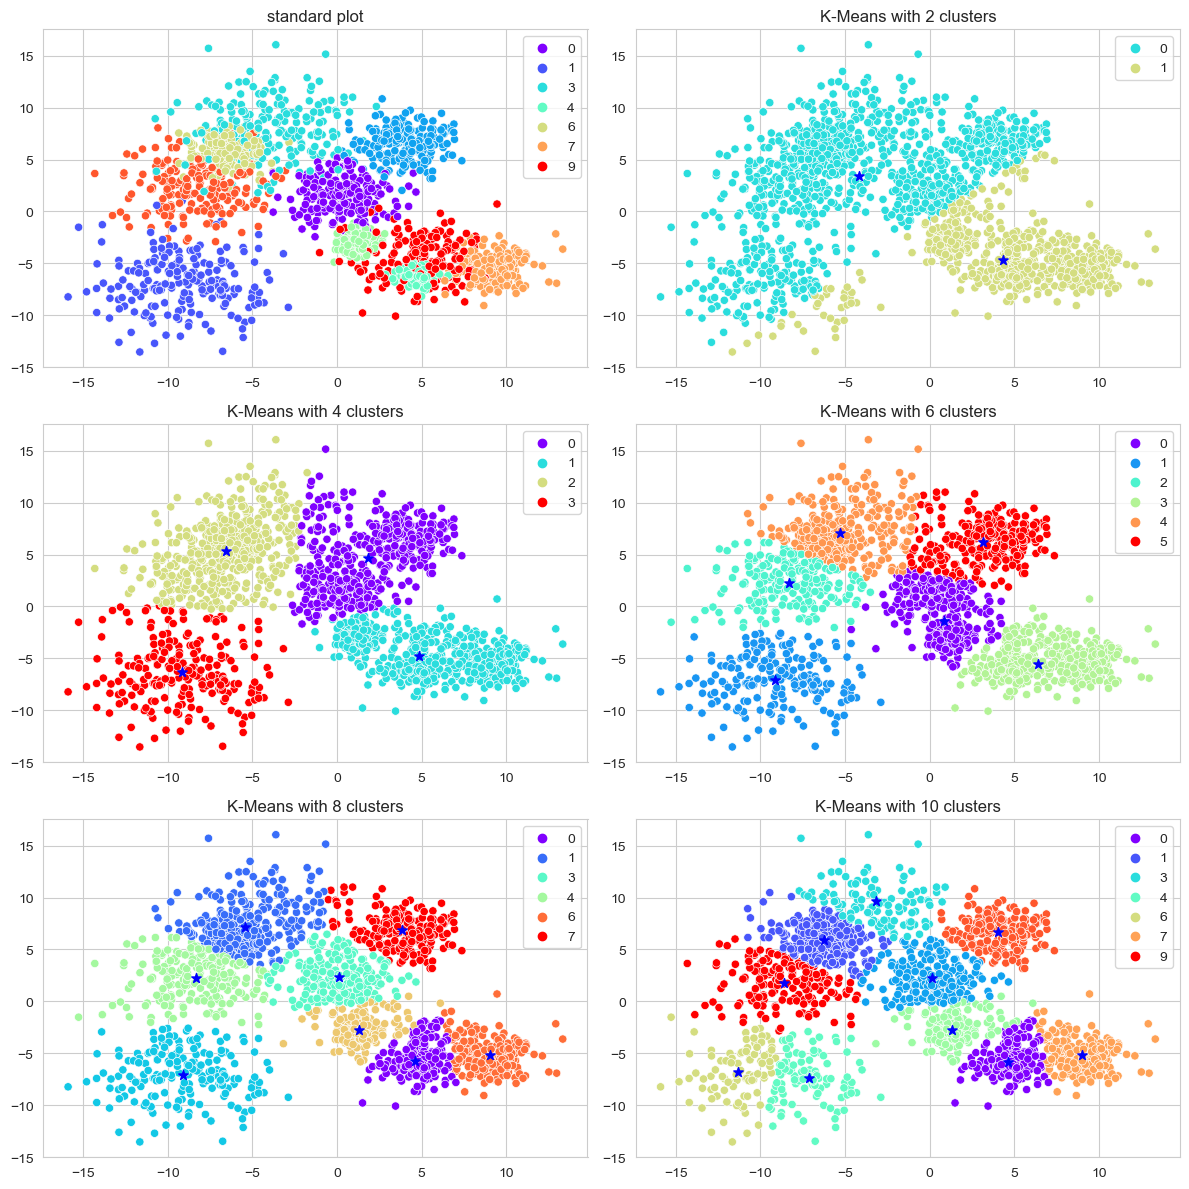

In [6]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
i = 1 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(3, 2, i)


# Plot the testing points
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=data[1], palette='rainbow', edgecolors="k")

ax.set_title('standard plot')

i += 1

# iterate over k-mean clusters
for name, kmeans_cluster in zip(names, kmean_clusters):
    ax = plt.subplot(3, 2, i)
    
    kmeans_cluster.fit(data[0])

    # Plot the testing points
    sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=kmeans_cluster.labels_, palette='rainbow', edgecolors="k")
    ax.scatter(kmeans_cluster.cluster_centers_[:,0], kmeans_cluster.cluster_centers_[:,1], marker="*", s=50, c='b')

    ax.set_title(name)
  
    i += 1
        
plt.tight_layout()

plt.show()

# DBSCAN Cluster Creation

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
from tqdm.notebook import tqdm

In [9]:
result = []
for eps_val in tqdm(np.arange(0.1, 2, 0.1)):
    for min_sample_val in np.arange(1, 20, 1):
        dbscan = DBSCAN(eps=eps_val, min_samples=min_sample_val).fit(data[0])
        result.append([eps_val, min_sample_val, pd.Series(dbscan.labels_).nunique(), 1 - (np.mean(data[1] != pd.Series(dbscan.labels_)))])

  0%|          | 0/19 [00:00<?, ?it/s]

In [10]:
t = pd.DataFrame(result, columns=['eps', 'min_sample', 'clusters', 'mean'])
t = t[t['clusters'] == 10].sort_values(['clusters', 'mean'], ascending=False).head(3)
t

,eps,min_sample,clusters,mean
185,1.0,15,10,0.1285
163,0.9,12,10,0.1275
86,0.5,11,10,0.1125


In [11]:
eps = t['eps'].values
min_samples = t['min_sample'].values
names = ['DBSCAN eps= ' + str(eps[idx])[:3]  +', min_samples= ' + str(min_samples[idx]) for idx in range(3)]


dbscan_clusters = [DBSCAN(eps=eps[0], min_samples=min_samples[0]),
                   DBSCAN(eps=eps[1], min_samples=min_samples[1]),
                   DBSCAN(eps=eps[2], min_samples=min_samples[2])]

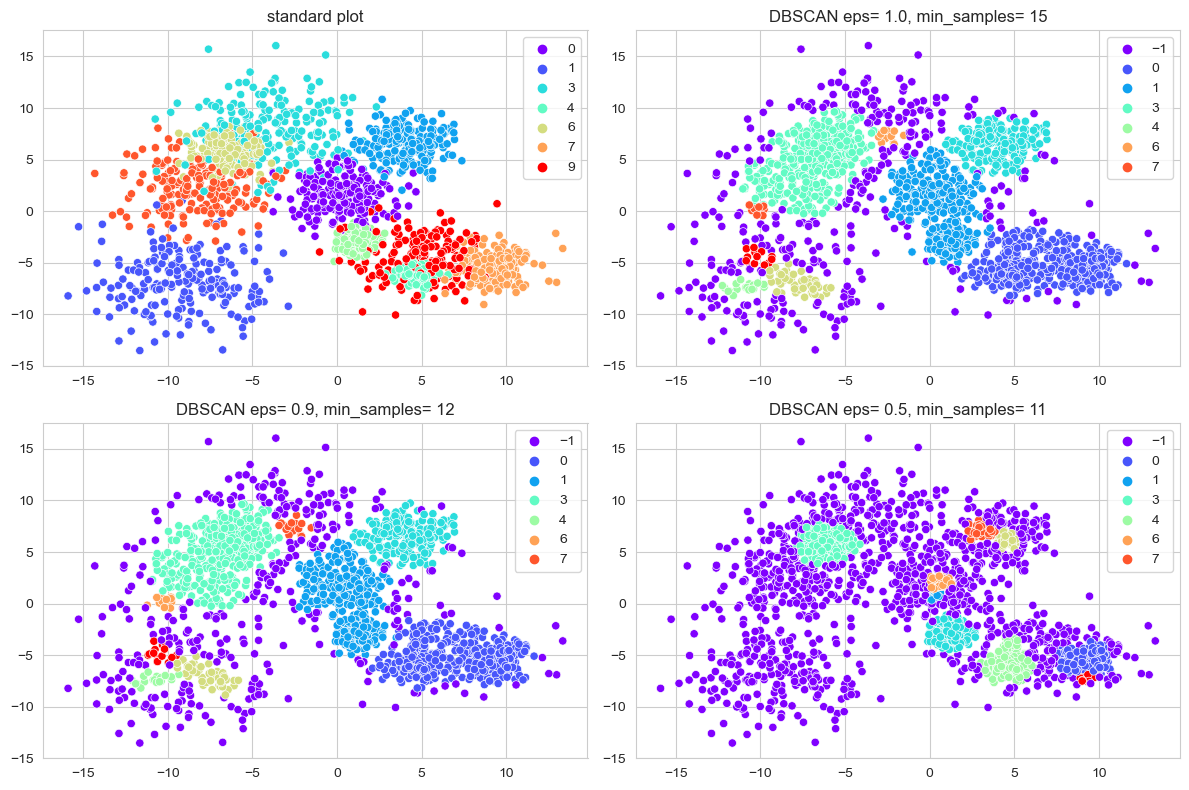

In [12]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
i = 1
ax = plt.subplot(2, 2, i)


# Plot the testing points
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=data[1], palette='rainbow', edgecolors="k")
ax.set_title('standard plot')

i += 1

# iterate over k-mean clusters
for name, dbscan_cluster in zip(names, dbscan_clusters):
    ax = plt.subplot(2, 2, i)
    
    dbscan_cluster.fit(data[0])

    # Plot the testing points
    sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=dbscan_cluster.labels_, palette='rainbow', edgecolors="k")
    ax.set_title(name)
    
    i += 1
        
plt.tight_layout()

plt.show()

# Fuzzy-C-Means cluster creation

In [13]:
from fcmeans import FCM

In [14]:
names = ['FCMeans with ' + str(idx) + ' clusters' for idx in range(2,11,2)]

fcmean_clusters = [FCM(n_clusters=2),
                   FCM(n_clusters=4),
                   FCM(n_clusters=6),
                   FCM(n_clusters=8),
                   FCM(n_clusters=10)]

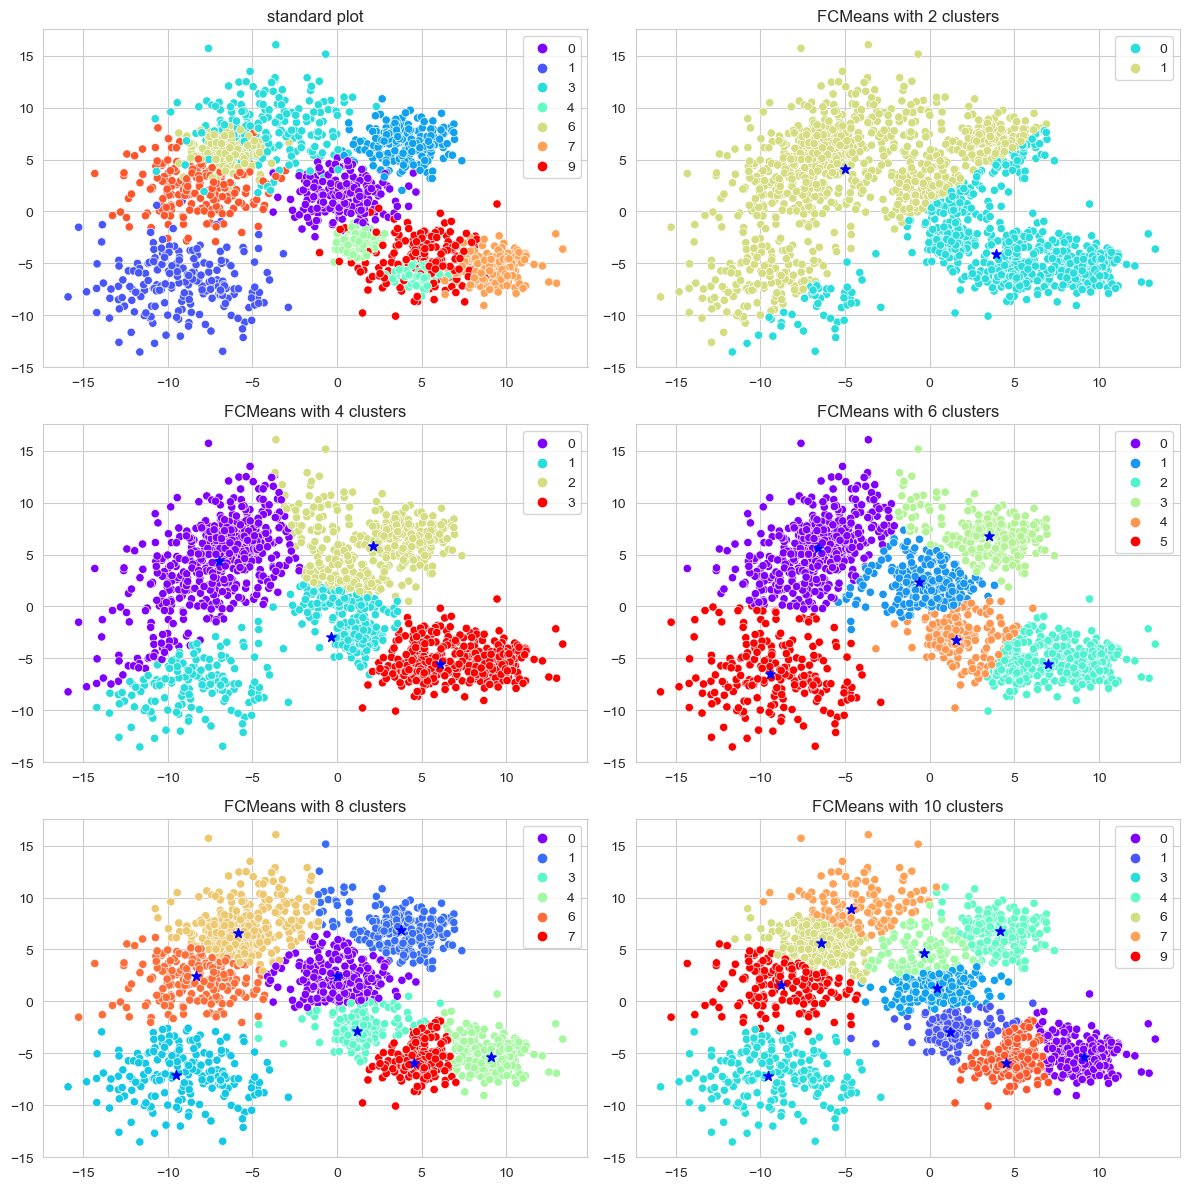

In [15]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
i = 1
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(3, 2, i)


# Plot the testing points
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=data[1], palette='rainbow', edgecolors="k")
ax.set_title('standard plot')

i += 1

# iterate over k-mean clusters
for name, fcm_cluster in zip(names, fcmean_clusters):
    ax = plt.subplot(3, 2, i)
    
    fcm_cluster.fit(data[0])
    
    fcm_centers = fcm_cluster.centers
    fcm_labels = fcm_cluster.predict(data[0])

    # Plot the testing points
    sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=fcm_labels, palette='rainbow', edgecolors="k")
    ax.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="*", s=50, c='b')

    ax.set_title(name)
    
    i += 1
        
plt.tight_layout()

plt.show()

# Comparing best clusterizators

In [16]:
names = ['K-Means with n_clusters=10', 'DBSCAN with eps=1.0, mi_samples=15', 'FCMeans with n_clusters=10']

all_clusters = [KMeans(n_clusters=10),
                   DBSCAN(eps=1, min_samples=15),
                   FCM(n_clusters=10)]

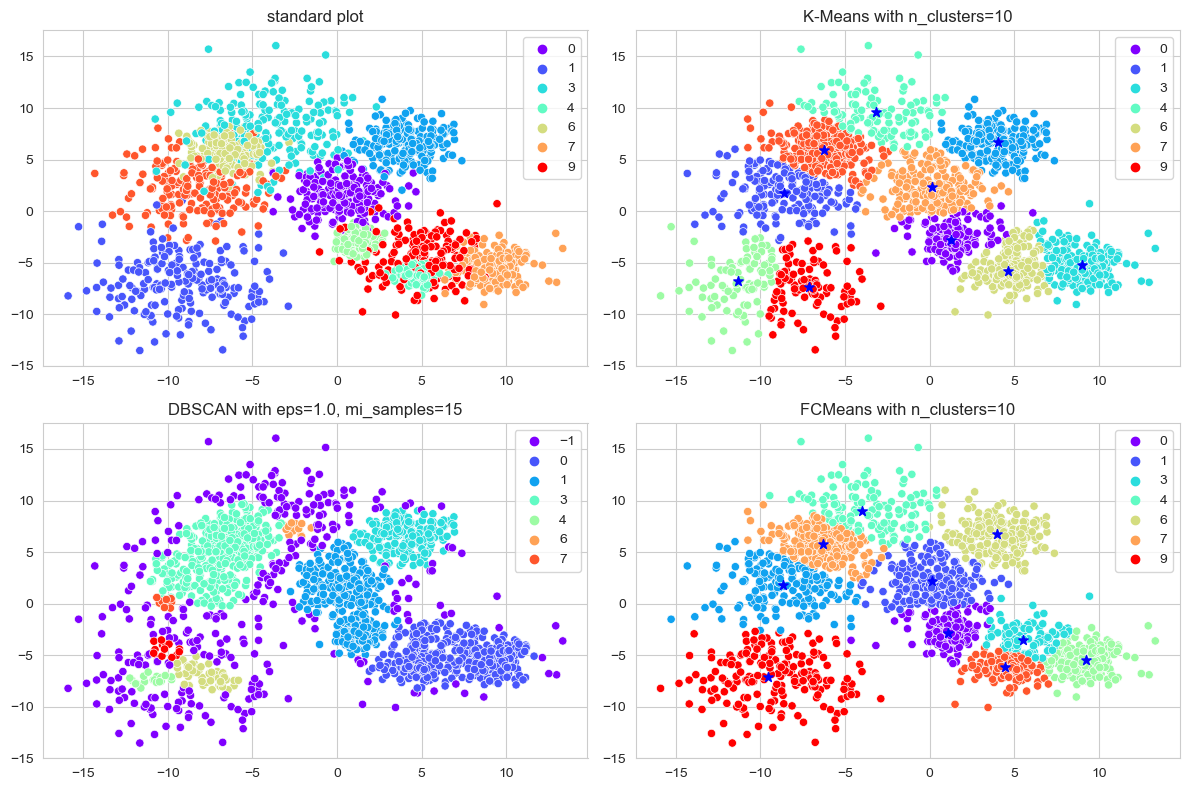

In [19]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
i = 1
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(2, 2, i)


# Plot the testing points
sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=data[1], palette='rainbow', edgecolors="k")
ax.set_title('standard plot')

i += 1

# iterate over k-mean clusters
for name, clusterizator in zip(names, all_clusters):
    ax = plt.subplot(2, 2, i)
    
    clusterizator.fit(data[0])
    
    if name == 'FCMeans with n_clusters=10':
        fcm_centers = clusterizator.centers
        fcm_labels = clusterizator.predict(data[0])

        # Plot the testing points
        sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=fcm_labels, palette='rainbow', edgecolors="k")
        ax.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="*", s=50, c='b')
    elif name == 'K-Means with n_clusters=10':
        # Plot the testing points
        sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=clusterizator.labels_, palette='rainbow', edgecolors="k")
        ax.scatter(clusterizator.cluster_centers_[:,0], clusterizator.cluster_centers_[:,1], marker="*", s=50, c='b')
    else:
        sns.scatterplot(x=data[0][:,0], y=data[0][:,1], hue=clusterizator.labels_, palette='rainbow', edgecolors="k")
        

    ax.set_title(name)
    
    i += 1
        
plt.tight_layout()

plt.show()